<div class="alert alert-block alert-info" style="margin-top: 20px"><h1>Matplotlib</h1>
<code>By AKSHAY KASHYAP</code></div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as mcolors

In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns # for dataset only

<hr><h3>It's time to draw <code>sin</code> function</h3><hr>

In [3]:
# defining range and sin fn
x = np.linspace(0,2*np.pi,100)
sin_x = np.sin(x)

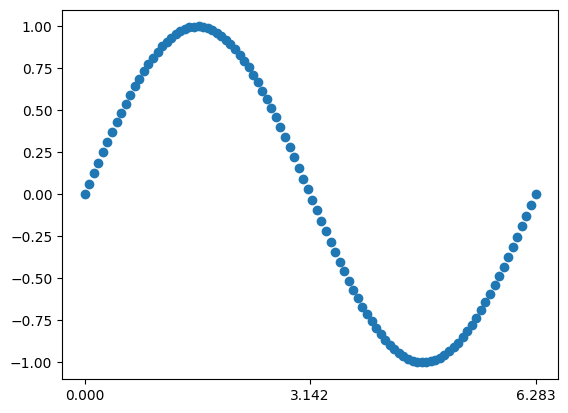

In [4]:
plt.xticks([0,np.pi,2*np.pi])
plt.scatter(x,sin_x) # cahnge ( plot <=> scatter )
plt.show()

<hr><h3>Adding <code>xticks</code></h3><hr>

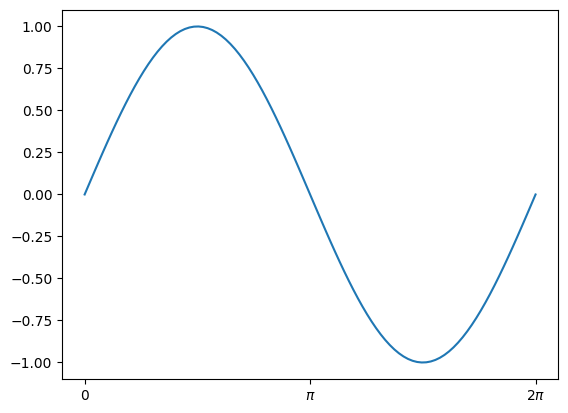

In [5]:
plt.xticks([0,np.pi,2*np.pi])
plt.plot(x,sin_x)

#or xticks with labels 
plt.xticks([0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$'])

plt.show()

<hr><h3>Adding supporting lines <code>(gridlines)</code></h3><hr>

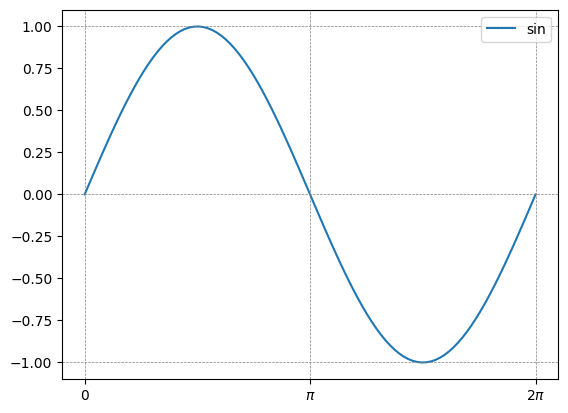

In [6]:
# plotting
# plt.xticks([0,np.pi,2*np.pi])
plt.plot(x,sin_x, label= "sin")

plt.xticks([0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$']) 

# supporting line vertically
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=np.pi, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x =2*np.pi, color='gray', linestyle='--', linewidth=0.5)

# supporting lines horizontally
plt.axhline(-1, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(1, color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()

<hr><div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>Scatter</h3></div><hr>

In [7]:
# df = sns.load_dataset('titanic') # when we import default dataset from seaborn
# laoding data
df= pd.read_csv("matplotlib_data/titanic.csv").dropna()

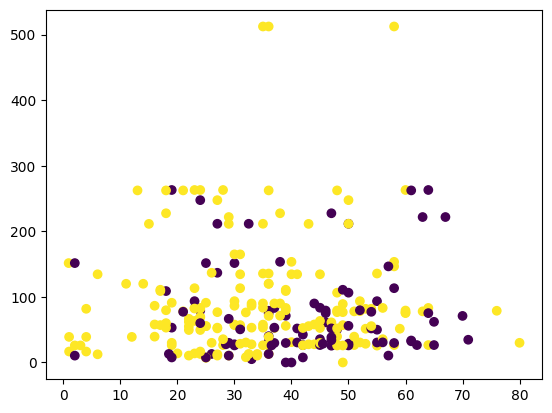

In [8]:
plt.scatter(df['age'],df['fare'], c=df["survived"])
plt.show()
#or 
# plt.scatter("age","fare",c ="survied", data=df)


<hr>custom colormap

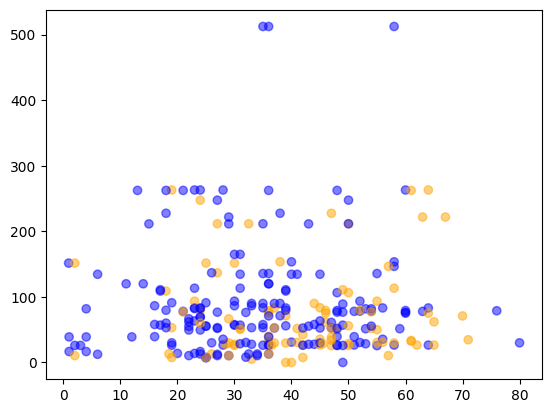

In [9]:
# using method imported from matplotlib's colors module
cmap_custom = mcolors.ListedColormap(['orange','blue']) 

# assign cmap 
plt.scatter("age","fare",c ="survived" ,cmap=cmap_custom ,data=df, alpha= 0.5) # alpha is transparency
plt.show()

<hr>Legends

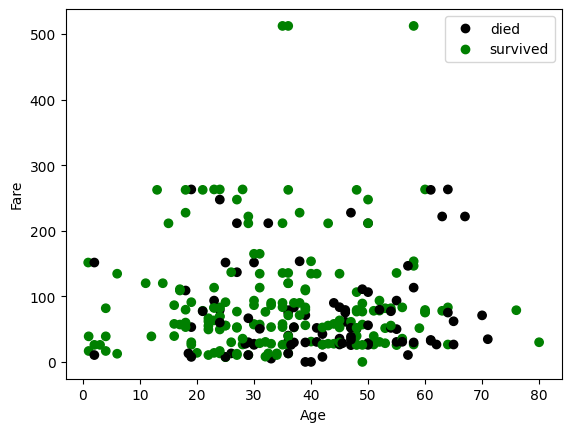

In [10]:
fig, ax = plt.subplots()

cmap = mcolors.ListedColormap(['black','green']) # custom colormap
labels = ['died', 'survived']

sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data = df)
#labels
_ = ax.set(xlabel = "Age", ylabel = "Fare")

# Create a legend with custom labels
_ = ax.legend(handles = sc.legend_elements()[0][:2], labels = labels)


# or in plt

# Create the scatter plot
# scatter = plt.scatter(df['age'], df['fare'], c=df['survived'])

# Create a legend with custom labels
# plt.legend(handles=scatter.legend_elements()[0][:2], labels=labels)
# plt.show()

<hr><h3>Let's create scatter plot, for both male and female</h3><hr>

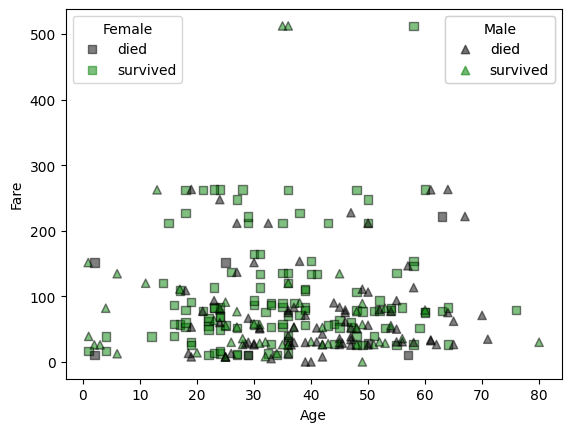

In [11]:
# Assuming df is your DataFrame containing 'age', 'fare', 'sex', and 'survived' columns

fig, ax = plt.subplots()

# Define color maps
cmap1 = mcolors.ListedColormap(['black', 'green'])
cmap2 = mcolors.ListedColormap(['red', 'blue'])

# Scatter plot for females
sc_female = ax.scatter('age', 'fare', c='survived', marker='s', cmap=cmap1,
                       alpha=0.5, label="Female", edgecolor='black',
                       data=df[df['sex'] == 'female']) #data=df[df['sex'].str.match('female')]

# Scatter plot for males
sc_male = ax.scatter('age', 'fare', c='survived', marker='^', cmap=cmap1,
                     alpha=0.5, label="Male", edgecolor='black',
                     data=df[df['sex'] == 'male']) 

# Legends for females
legend_f_elements, legend_f_labels = sc_female.legend_elements()
legend_f = ax.legend(handles=legend_f_elements[:2], title='Female', labels=['died', 'survived'],loc='upper left')

# Legends for males
handles_m_elements = sc_male.legend_elements()[0]
legend_m = ax.legend(handles=handles_m_elements[:2], title='Male', labels=['died', 'survived'], loc='upper right')
# NOTE: both legends are same but written in different way 

# Add both legends to the plot
#( comment and see)
ax.add_artist(legend_f)
ax.add_artist(legend_m)

# Set labels for axes
ax.set(xlabel='Age', ylabel='Fare')

plt.show()


<hr><div><h3>Bubbles</h3>
<code>Bubbles</code> plot is <code>Scatter</code> plot with <code>different size</code> </div>

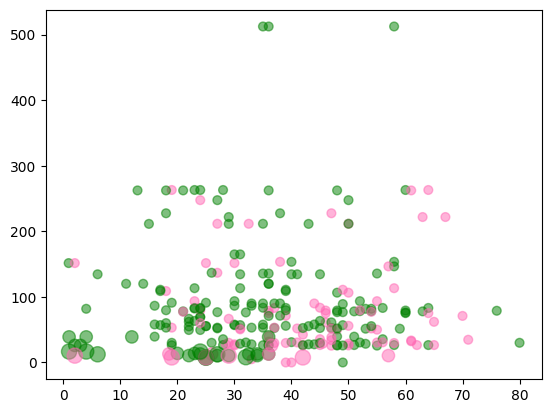

In [12]:
fig,ax = plt.subplots()
cmap = mcolors.ListedColormap(['hotpink','green'])

_ = ax.scatter("age","fare",alpha = 0.5, c="survived",cmap=cmap, s=df['pclass']*40 ,data=df)
plt.show()

<hr><div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3><code>Subplots</code> (multi) & <code>sharex</code>, <code>sharey</code></h3</div>

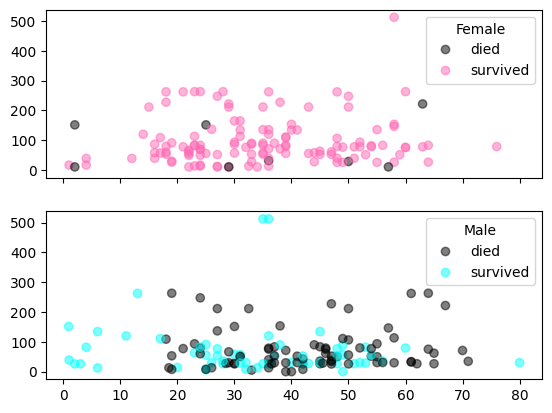

In [13]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=True)

# Define colormaps
cmap_f = mcolors.ListedColormap(['black', 'hotpink'])
cmap_m = mcolors.ListedColormap(['black', 'cyan'])

# Scatter plots
sc_f = ax1.scatter("age", "fare", c="survived", data=df[df["sex"] == 'female'], cmap=cmap_f, alpha=0.5)
sc_m = ax2.scatter("age", "fare", c="survived", data=df[df['sex'] == 'male'], cmap=cmap_m, alpha=0.5)

# Legends
legend_f_elements, legend_f_labels = sc_f.legend_elements()
legend_f = ax1.legend(handles=legend_f_elements[:2], labels=['died', 'survived'] ,title="Female")

legend_m_elements, legend_m_labels = sc_m.legend_elements()
legend_m = ax2.legend(handles=legend_m_elements[:2], labels=['died', 'survived'], title="Male")

# Show the plot
plt.show()